# Alejandro Jesús Manotas Marmolejo

# Código: 200108289

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from math import sqrt
from sklearn import preprocessing

#Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier

#Display metrics
import pydotplus
from sklearn.tree import export_text
from IPython.display import Image

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# 1. Aprobación de crédito

## Análisis exploratorio

In [2]:
#Show dataset
data_credits = pd.read_excel('DataSetCreditos.xlsx')
#Top 5 our data
data_credits.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Top 5 data from bottom
data_credits.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


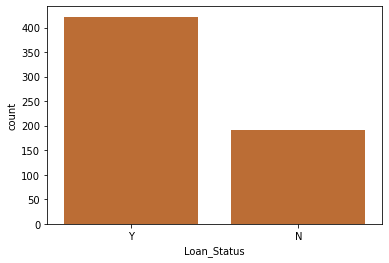

In [4]:
#Analysis of loan status
sns.countplot(data_credits['Loan_Status'], color='chocolate')
plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


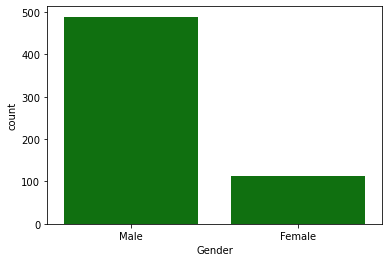

In [5]:
#Analysis of people gender
sns.countplot(data_credits['Gender'], color='green')
plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


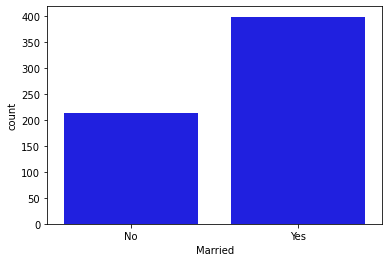

In [6]:
#Analysis of people marital state
sns.countplot(data_credits['Married'], color='blue')
plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


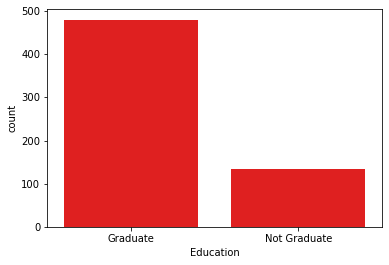

In [7]:
#Analysis of people education
sns.countplot(data_credits['Education'], color='red')
plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


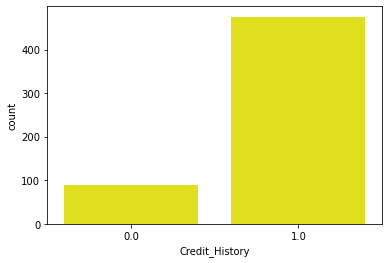

In [8]:
#Analysis of credit history
sns.countplot(data_credits['Credit_History'], color='yellow')
plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


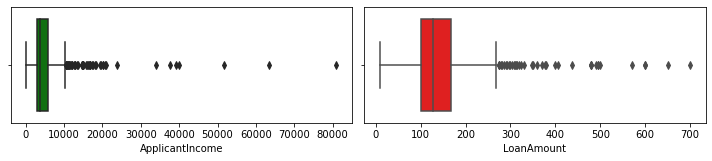

In [9]:
boxplots = plt.figure(figsize=(10,4))

#Boxplot for applicant income
boxplots.add_subplot(2,2,1)
sns.boxplot(data_credits['ApplicantIncome'],color='green')
plt.tight_layout(h_pad=0.4)

#Boxplot for loan amount
boxplots.add_subplot(2,2,2)
sns.boxplot(data_credits['LoanAmount'],color='red')

plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alejo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


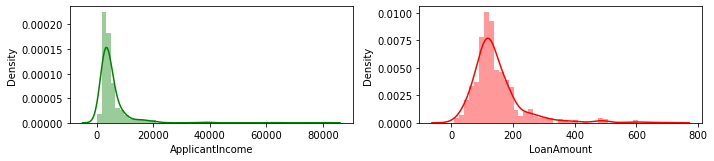

In [10]:
subplots = plt.figure(figsize=(10,4))

#Histogram and distribution diagram for applicants income
subplots.add_subplot(2,2,1)
sns.distplot(data_credits['ApplicantIncome'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Histogram and distribution diagram for loan amount
subplots.add_subplot(2,2,2)
sns.distplot(data_credits['LoanAmount'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

In [11]:
columns = ['Loan_ID','Property_Area', 'Loan_Status', 'Self_Employed', 'Gender', 'Married', 'Education', 'Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_credits_factorized = data_credits.copy()
for column in columns:
  data_credits_factorized[column],_ = pd.factorize(data_credits_factorized[column])

data_credits_factorized = data_credits_factorized.dropna(axis=1)
data_credits_factorized

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,5849,0.0,-1,0,0,0,0
1,1,0,1,1,0,0,4583,1508.0,0,0,0,1,1
2,2,0,1,0,0,1,3000,0.0,1,0,0,0,0
3,3,0,1,0,1,0,2583,2358.0,2,0,0,0,0
4,4,0,0,0,0,0,6000,0.0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,1,0,0,0,0,2900,0.0,144,0,0,1,0
610,610,0,1,3,0,0,4106,0.0,181,3,0,1,0
611,611,0,1,1,0,0,8072,240.0,202,0,0,0,0
612,612,0,1,2,0,0,7583,0.0,53,0,0,0,0


In [12]:
#Correlation between features
data_credits_factorized.corr().style.background_gradient().set_precision(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.00,0.01,-0.01,0.05,0.04,0.04,0.02,0.04,0.40,0.06,0.02,0.07,-0.01
Gender,0.01,1.00,-0.35,-0.17,-0.02,-0.05,-0.09,-0.07,0.02,-0.03,-0.02,0.06,0.01
Married,-0.01,-0.35,1.00,0.35,0.02,0.03,0.05,0.08,0.02,-0.00,-0.03,-0.00,-0.08
Dependents,0.05,-0.17,0.35,1.00,0.05,0.05,0.12,0.03,0.05,0.07,0.03,0.01,-0.01
Education,0.04,-0.02,0.02,0.05,1.00,0.00,-0.14,-0.06,-0.07,0.05,0.04,-0.00,0.09
Self_Employed,0.04,-0.05,0.03,0.05,0.00,1.00,0.09,-0.05,0.00,0.02,0.06,0.03,0.01
ApplicantIncome,0.02,-0.09,0.05,0.12,-0.14,0.09,1.00,-0.12,0.14,0.04,0.03,-0.01,0.00
CoapplicantIncome,0.04,-0.07,0.08,0.03,-0.06,-0.05,-0.12,1.00,0.11,0.03,-0.07,-0.03,0.06
LoanAmount,0.40,0.02,0.02,0.05,-0.07,0.00,0.14,0.11,1.00,0.05,0.01,0.11,0.04
Loan_Amount_Term,0.06,-0.03,-0.00,0.07,0.05,0.02,0.04,0.03,0.05,1.00,-0.00,-0.04,0.07


## Naïve Bayes


In [13]:
#Create a Naive Bayes object
nb = GaussianNB()

#Create variable x and y
x = data_credits_factorized.drop(columns=['Loan_Status'])
y = data_credits_factorized['Loan_Status']

#Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=13)

#Training the model
nb.fit(x_train,y_train)

#Model test
y_pred = nb.predict(x_test)

#Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))
#Precision
print("Precision:",precision_score(y_test,y_pred , average='micro'))

Accuracy: 0.8292682926829268
Precision: 0.8292682926829268


In [14]:
print(y_pred)  #0: loan approved, 1: loan not approbed

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1]


## Decision Trees

In [15]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Create variable x and y
x1 = data_credits_factorized.drop(columns=['Loan_Status'])
y1 = data_credits_factorized['Loan_Status']

# Training the Decision Tree - Can split the data here for training
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=13)

#config = {'algorithm': 'ID3'}
clf_train = clf.fit(x1_train, y1_train)

#Predict testing set
y1_pred = clf.predict(x1_test)

# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box] ;
0 [label="X[10] <= 0.5\nentropy = 0.904\nsamples = 491\nvalue = [334, 157]"] ;
1 [label="X[11] <= 1.5\nentropy = 0.744\nsamples = 416\nvalue = [328, 88]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[8] <= 174.5\nentropy = 0.817\nsamples = 256\nvalue = [191, 65]"] ;
1 -> 2 ;
3 [label="X[8] <= -0.5\nentropy = 0.841\nsamples = 241\nvalue = [176, 65]"] ;
2 -> 3 ;
4 [label="X[9] <= 1.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]"] ;
3 -> 4 ;
5 [label="X[7] <= 1621.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]"] ;
4 -> 5 ;
6 [label="X[3] <= -0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]"] ;
5 -> 6 ;
7 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6 -> 7 ;
8 [label="X[7] <= 562.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]"] ;
6 -> 8 ;
9 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 9 ;
10 [label="X[6] <= 2580.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
8 -> 10 ;
11 [label="entropy = 0.0\

In [16]:
#Accuracy
print("Accuracy:", accuracy_score(y1_test, y1_pred))

#Precision
print("Precision:",precision_score(y1_test,y1_pred , average='micro'))

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666


In [17]:
print(y1_pred) #0: loan accepted, 1: loan accepted

[0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1]


In [18]:
# Tree visualization
r = export_text(clf_train, feature_names=list(x1.columns.values))
print(r)

|--- Credit_History <= 0.50
|   |--- Property_Area <= 1.50
|   |   |--- LoanAmount <= 174.50
|   |   |   |--- LoanAmount <= -0.50
|   |   |   |   |--- Loan_Amount_Term <= 1.50
|   |   |   |   |   |--- CoapplicantIncome <= 1621.50
|   |   |   |   |   |   |--- Dependents <= -0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Dependents >  -0.50
|   |   |   |   |   |   |   |--- CoapplicantIncome <= 562.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- CoapplicantIncome >  562.50
|   |   |   |   |   |   |   |   |--- ApplicantIncome <= 2580.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- ApplicantIncome >  2580.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- CoapplicantIncome >  1621.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Loan_Amount_Term >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- LoanAmount >  -0.50
|   |   |   |   |--- Prop

## KNN

In [19]:
#Create variable x and y
x2 = data_credits_factorized.drop(columns=['Loan_Status'])
y2 = data_credits_factorized['Loan_Status']

#Split data into training and testing data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=13)

for K in range(1,11):
    #Create model
    knn = KNeighborsClassifier(n_neighbors = K)

    #Training the model
    knn.fit(x2_train, y2_train)  

    #Model test
    y2_pred = knn.predict(x2_test) 
    
    #Accuracy
    print("Accuracy  for k: ",K,'is:',accuracy_score(y2_test,y2_pred))
    print("Precision for k: ",K,'is:',precision_score(y2_test,y2_pred , average='micro'), end='\n \n')

Accuracy  for k:  1 is: 0.5691056910569106
Precision for k:  1 is: 0.5691056910569106
 
Accuracy  for k:  2 is: 0.6585365853658537
Precision for k:  2 is: 0.6585365853658537
 
Accuracy  for k:  3 is: 0.5528455284552846
Precision for k:  3 is: 0.5528455284552846
 
Accuracy  for k:  4 is: 0.6097560975609756
Precision for k:  4 is: 0.6097560975609756
 
Accuracy  for k:  5 is: 0.5609756097560976
Precision for k:  5 is: 0.5609756097560976
 
Accuracy  for k:  6 is: 0.6016260162601627
Precision for k:  6 is: 0.6016260162601627
 
Accuracy  for k:  7 is: 0.5772357723577236
Precision for k:  7 is: 0.5772357723577236
 
Accuracy  for k:  8 is: 0.6504065040650406
Precision for k:  8 is: 0.6504065040650406
 
Accuracy  for k:  9 is: 0.6260162601626016
Precision for k:  9 is: 0.6260162601626016
 
Accuracy  for k:  10 is: 0.6585365853658537
Precision for k:  10 is: 0.6585365853658537
 


In [20]:
print(y2_pred) #0: loan accepted, 1: not accepted

[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1]


## Conclusiones

Para este caso el modelo que tuvo mayor precisión fue el de Naïve Bayes y el de Decision trees, en el caso de KNN Neighboors
se presentan varios k, del cual el que tuvo una mayor precisión fue para un k de 10, sin embargo, no supera a la precisión del Decision Trees. La exactitud de los modelos se presenta de igual forma, la mayor exactitud la tiene Naïve Bayes, seguido de Decision Trees y, por último, KNN Neighboors.

# 2. Clasificación de dígitos

In [21]:
#Show dataset
data_digits = pd.read_csv('DataSetDigitos.csv')
#Top 5 our data
data_digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Análisis explotario

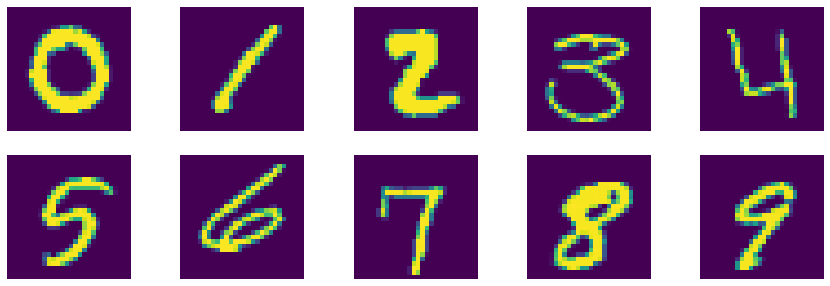

In [22]:
fig, axs = plt.subplots(2, 5, figsize=(15,5))
labels = data_digits.iloc[6, 1:].values.reshape((28,28))
for i in range(0,10):
  ax = axs.flat[i]
  labels = data_digits[data_digits.label == i].iloc[0, 1:].values.reshape((28,28))
  ax.imshow(labels)
  ax.axis('off')

plt.show()

C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


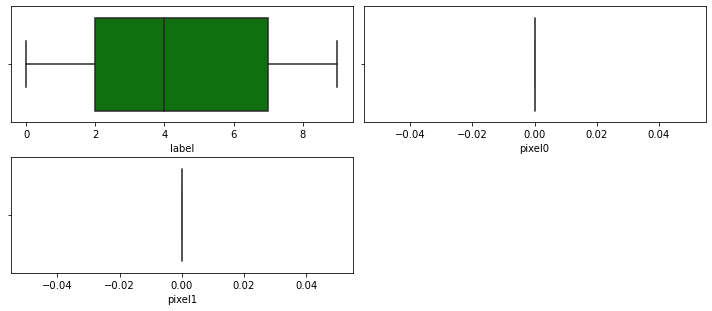

In [23]:
boxes = plt.figure(figsize=(10,4))

#Boxplot for label
boxes.add_subplot(2,2,1)
sns.boxplot(data_digits['label'],color='green')
plt.tight_layout(h_pad=0.4)

#Boxplot for pixel0
boxes.add_subplot(2,2,2)
sns.boxplot(data_digits['pixel0'],color='red')

#Boxplot for pixel1
boxes.add_subplot(2,2,3)
sns.boxplot(data_digits['pixel1'],color='red')

plt.show()

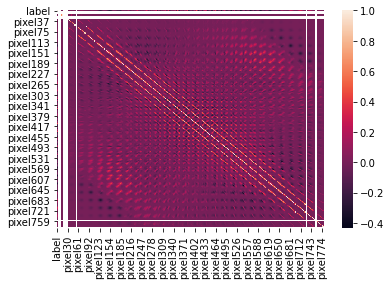

In [24]:
#Correlation between features
sns.heatmap(data_digits.corr())
plt.show()

## Naïve Bayes

In [25]:
#Create a Naive Bayes object
nb = GaussianNB()

#Create variable x and y
xd = data_digits.drop(columns=['label'])
yd = data_digits['label']

#Split data into training and testing data
xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd , test_size=0.3, random_state=64)

#Training the model
nb.fit(xd_train,yd_train)

#Model test
yd_pred = nb.predict(xd_test)

#Accuracy
print("Accuracy:",accuracy_score(yd_test,yd_pred))
#Precision
print("Precision:",precision_score(yd_test,yd_pred , average='micro'))

Accuracy: 0.553968253968254
Precision: 0.553968253968254


In [26]:
print(yd_pred)

[8 7 8 ... 1 6 6]


## Decision Trees

In [27]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Create variable x and y
xd1 = data_digits.drop(columns=['label'])
yd1 = data_digits['label']

# Training the Decision Tree - Can split the data here for training
xd1_train, xd1_test, yd1_train, yd1_test = train_test_split(xd1, yd1, test_size=0.2, random_state=13)

#config = {'algorithm': 'ID3'}
clf_train = clf.fit(xd1_train, yd1_train)

#Predict testing set
yd1_pred = clf.predict(xd1_test)

# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box] ;
0 [label="X[461] <= 0.5\nentropy = 3.32\nsamples = 33600\nvalue = [3307, 3759, 3369, 3485, 3249, 2989, 3313, 3514, 3233\n3382]"] ;
1 [label="X[378] <= 8.5\nentropy = 2.877\nsamples = 13152\nvalue = [3204, 105, 487, 2415, 523, 1842, 829, 2373, 305\n1069]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[597] <= 6.5\nentropy = 2.126\nsamples = 6819\nvalue = [3007, 9, 284, 180, 153, 305, 476, 2223, 5, 177]"] ;
1 -> 2 ;
3 [label="X[514] <= 0.5\nentropy = 1.773\nsamples = 3183\nvalue = [243, 2, 62, 27, 147, 94, 321, 2117, 4, 166]"] ;
2 -> 3 ;
4 [label="X[155] <= 0.5\nentropy = 0.987\nsamples = 2439\nvalue = [86, 2, 28, 21, 52, 62, 24, 2085, 1, 78]"] ;
3 -> 4 ;
5 [label="X[433] <= 2.5\nentropy = 0.647\nsamples = 2280\nvalue = [24, 0, 15, 9, 43, 26, 12, 2080, 0, 71]"] ;
4 -> 5 ;
6 [label="X[622] <= 5.5\nentropy = 0.438\nsamples = 2194\nvalue = [24, 0, 14, 8, 5, 17, 10, 2076, 0, 40]"] ;
5 -> 6 ;
7 [label="X[152] <= 9.5\nentropy = 0.

In [28]:
#Accuracy
print("Accuracy:", accuracy_score(yd1_test, yd1_pred))

#Precision
print("Precision:",precision_score(yd1_test,yd1_pred , average='micro'))

Accuracy: 0.8636904761904762
Precision: 0.8636904761904762


In [29]:
print(yd1_pred)

[4 3 2 ... 3 7 1]


In [30]:
# Tree visualization
r = export_text(clf_train, feature_names=list(xd1.columns.values))
print(r)

|--- pixel461 <= 0.50
|   |--- pixel378 <= 8.50
|   |   |--- pixel597 <= 6.50
|   |   |   |--- pixel514 <= 0.50
|   |   |   |   |--- pixel155 <= 0.50
|   |   |   |   |   |--- pixel433 <= 2.50
|   |   |   |   |   |   |--- pixel622 <= 5.50
|   |   |   |   |   |   |   |--- pixel152 <= 9.50
|   |   |   |   |   |   |   |   |--- pixel265 <= 32.50
|   |   |   |   |   |   |   |   |   |--- pixel350 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- pixel488 <= 97.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- pixel488 >  97.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |   |   |--- pixel350 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- pixel210 <= 85.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- pixel210 >  85.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3


## KNN

In [31]:
#Create variable x and y
xd2 = data_digits.drop(columns=['label'])
yd2 = data_digits['label']

#Split data into training and testing data
xd2_train, xd2_test, yd2_train, yd2_test = train_test_split(xd2, yd2, test_size=0.2, random_state=13)

#Create model
knn = KNeighborsClassifier(n_neighbors=3)

#Training the model
knn.fit(xd2_train, yd2_train)

#Model test
yd2_pred = knn.predict(xd2_test) 
    
#Accuracy
print('Accuracy: ', accuracy_score(yd2_test,yd2_pred))
#Precision
print("Precision: ",precision_score(yd2_test,yd2_pred , average='micro'))

Accuracy:  0.963452380952381
Precision:  0.963452380952381


In [32]:
print(yd2_pred)

[4 3 2 ... 3 7 1]


## Conclusiones

En este caso a diferencia del caso anterior el que presenta mayor precisión y exactitud es el KNN Neighboors con un K de 3, seguido del Decision Trees y, por último, el Naïve Bayes. La exactitud también tiene el mismo ranking, la mejor exactitud la tiene KNN Neighboor y la peor pertenece a Naïve Bayes.